# <!-- TITLE --> - TITLE : BUIDL A LOGISTIC REGRESSION MODEL IN PYTHON -
<img width="800px" heigh="800px" src="out1.png"></img>

#### <!-- AUTHOR --> - Author : __Dr. Amiehe-Essomba__ (c) 2023


## Objectives :
 - We are going to create a  **Logistic Regression** using one neurone. \
So, to make it possible : we'll use sigmoid function as activation function \
therefore note that there are others several functions that we can use as activation function such as \
    * __than__
    ```python
    f(x) = [np.exp(x) - np.exp(-x)] / [np.exp(x) + np.exp(-x)]
    ``` 

    * __RELU (Rectified Linear Unid)__
    ```python
    f(x) = max(X, 0 )
    ```
    
    * __identity__
    ```python
    f(x) = x
    ```

    * __sigmoi__
    ```python
    f(x) = 1 / (1 + np.exp(-x))
    ```

 
## Equations : 
 - ```python
    Z = W.T.dot(X) + b
    ```

  Where :

 * Z : is a parameter
 * W : is the weight 
 * b : is the bias 
 * X : a matrix (n, m) that represents the features or DNN inputs 

- ```python
  1. g(Z) = (1 / (1 + exp(-Z))) is the true form of activation function
  2. loss = - ( (1-y) * log(1-g) + y * log(g) ) is the loss function
  3. loss = - ( (1-y) * log(1-g) + y * log(g) ) is the loss function
  << binary cross entropy >> usually used for binary classification issues>>
  
  4. L = (1/m) * sum(loss) is the cost function use to compute the gradient 
  5. grad(O) = dL/dO is the gradient form

  with O = (W, b)

  6. dg    = dL/dg = (g-y)/(1-g) the derivative of L in function of g
  7. dg/dz = (1-g) the derivative of g in function of Z

  8. dz/db = 1 the derivative of Z in function of b
  9. dz/dw = X the derivative of Z in function of W
    ```

## Back propagation equations : 

```python 
    dw = dg * (dg/dz) * (dz/dw) = (1/m) *  X * ( g - a).T
    db = dg * (dg/dz) * (dz/db) = (1/m).sum(g - a )
    d_epsilon = loss[l] - loss[l-1]
```

## Turning hyperparameters :
* learning_rate = 0.01
* number of layers in this case 1 layer (NL = 1) with one neurone
* shape is the dimension in features
* max_iter = 5000 for iterations to reach to the convergence of until the 
* epsilon = 1e-4
variation of gradient become smaller (dgrad < epsilon) where epsilon is the tolerence
in this case we'll use while loop to be sure that we reach to the convergence (local minimum is found)

* shape = X.shape = (n, m)

to build a DNN with a single neurone as below we need to initialize W and b to zeros 

## Model form :
* (inputs)
*   X1  \    (neurone)   
*   X2    ------ O ------> y(output) 
*   X3  /

## Initialization :
```python
params = {'b' : np.zeros((NL, 1)), 'W' : np.zeros((1, n)) }
```

Then after initaliazing parameters we can compute the rest of functions

```python
index, costs = 0, []
while d_epsilon > epsilon:
    Z       = params["W"].dot(X) + params['b']
    g       = (1.0 / (1.0 + np.exp(-Z)))
    loss    = - ( (1-y) * log(1-g) + y * log(g) )
    cost    = - (1/m) * ( (1-y) * log(1-g) + y * log(g) ).sum(axis=1)
    costs.append(cost)
    # back propagation 
    params['W'] = params['W'] - learning_rate * dgrad/dW
    params['b'] = params['b'] - learning_rate * dgrad/db

    if index == 0: pass 
    else:
        d_epsilon = costs[index] - costs[index-1]

    index += 1
```

## What we will do here :

 - loading data from sklearn(cancer dataset)
 - Data preprocessing( **cleaning, normalization**)
 - Building DNN model
 - Train model
 - Test model
 - Computing metrics for evaluating models
 

In [36]:
# numerical modules importation 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


In [37]:
def metrics(y_pred, y_test):
    # computing accuracy of the simple model
    accuracy = (y_pred == y_test ).sum() / y_pred.shape[1]
    
    return accuracy

In [38]:
# building activation function 

def sigmoid(X : np.ndarray ):
    """
    As explained previously for activation function 
    we are going to use sigmoid one 

    sigmoid  = (1 / (1 + np.exp(-X)))
    """
    sig = 1. / (1.0 + np.exp(-X) )
    return sig


In [39]:
# params intialization 

def Params(layers_size : list, NL : int = 1, r_type='zeros'):
    """
    layers_size contains the size of the input features and the size of the classification layer
    NL is the number of the layers
    """
    params = {}
    np.random.seed(50)
    for i in range(1, NL+1):
        if r_type == 'zeros':
            params[f'W{i}'] = np.zeros((layers_size[i], layers_size[i-1])) 
        elif r_type == 'random':
            params[f'W{i}'] = np.random.randn(layers_size[i], layers_size[i-1])
        else: pass 
        #
        if NL == 1:  params[f'b{i}'] = 0.0
        else: params[f'b{i}'] = np.zeros((layers_size[i], 1))
    
    return params

In [40]:
# computing the back propagation

def back_propagation(X : np.ndarray, Y : np.ndarray, params : dict):
    m = X.shape[1]

    # bias and weight 
    b, W = params['b1'], params['W1']

    Z = W.dot(X) + b
    
    # sigmoid compute
    G = sigmoid(X=Z)
    # cost function 
    #cost = -(1.0 / m ) * (Y * np.log(G) + (1-Y) * np.log(1 - G)).sum(axis=1)
    cost = -(1.0 / m ) * ( ( Y * np.log(G) ) + (1 - Y) * np.log(1 - G) ).sum(axis=1)
    #cost = np.squeeze( np.array( cost ) )

    # computing gradient components 
    dw = (1. / m) * X.dot( (G - Y).T )
    db = ( G - Y ).mean(axis = 1)[0]

    grads = (dw, db)
    
    return grads, cost[0]

In [41]:
def model_prediction(X:np.ndarray, params:dict= {}):
    # prediction we will use sigmoid function 
    W, b            = params["W1"], params['b1']
    Z               = W.dot( X ) + b
    G               = sigmoid(X=Z)
    # Y prediction initialized to zeros
    Y_prediction    = np.zeros(G.shape) 

    for i in range(G.shape[1]):
        for j in range(G.shape[0]):
            if G[j, i] > 0.5  : Y_prediction[j, i] = 1.0 
            else: pass 

    return Y_prediction

In [42]:
def model(X: np.ndarray, Y: np.ndarray, 
      params : dict = {}, learning_rate:float = 1e-3, 
      epsilon : float = 1e-3, Y_test = [], X_test = [],
      print_val : bool = False ):
    
      
      grads, cost        = back_propagation (X=X, Y=Y, params=params)
      max_iter_, costs   = [], []
      index              = 0
      score              = []

      while True:#for i in range(max_iter):
            # propagate bias and weight 
            params['W1'] = params['W1'] - learning_rate *  grads[0].T
            params['b1'] = params['b1'] - learning_rate *  grads[1]
            
            # back forward propagation 
            grads, cost = back_propagation (X=X, Y=Y, params=params)
            # prediction
            Y_pred      = model_prediction(X=X_test, params=params)
            # computing the confidence score (accuracy)
            s           = metrics(y_pred=Y_pred, y_test=Y_test)

            # storing data compute
            score.append(s)
            costs.append(cost)
            max_iter_.append(index)
            
            
            if index == 0: pass
            else:
                  # condition to break the while loop 
                  d_epsilon = np.abs( costs[index] - costs[index-1] )
                  if d_epsilon < epsilon : 
                        print("\nGood  job we reach to the convergence. Local minimum found")
                        break
                  else: pass 
            
            # print data at each 10 step
            if print_val is True:
                  if index % 10 == 0:
                        if cost not in [np.nan]:
                              print(f"cost function : {cost} : interation : {index} ")
                        else: break
                  else: pass 
            else: pass 

            index += 1
      
      return params, costs, max_iter_, score

In [43]:
# let's take an example of load_breast_cancer of sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as tts 
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.datasets import make_classification as mc

sc = scaler()
#loading cancer dataset
X, y = load_breast_cancer(return_X_y=True)
# number of features 
n_features = 2
# normalizing data 
X = sc.fit_transform(X)


In [58]:
# data processing 
x_train, x_test, y_train, y_test = tts(X[:, [0, 4]], y, random_state=50, shuffle=True, test_size=0.3)
#x_train, x_test = sc.fit_transform(x_train), sc.transform(x_test)

# reshape data
y_train, y_test = y_train.reshape((1, -1)), y_test.reshape((1, -1))
x_train, x_test = x_train.reshape((n_features, -1)), x_test.reshape((n_features, -1))

# defining the layer dimension
layers_size, NL = [n_features, 1], 1

# params np.zeros initialization 
params = Params(layers_size=layers_size, NL=NL, r_type='zeros')

# training the model
params, costs, max_iter, score = model(X=x_train, Y=y_train, 
                params=params, print_val=False, Y_test=y_test,
                epsilon=1e-7, learning_rate=1e-2, X_test=x_test
                )


Good  job we reach to the convergence. Local minimum found


In [59]:

y_predict = params['W1'].dot(x_test) + params['b1']
y_predict = y_predict.reshape((-1,))

y_sort    = np.argsort(x_test[0, :])
x_test_sort = x_test[0, :][y_sort]
y_predict  = y_predict[y_sort]

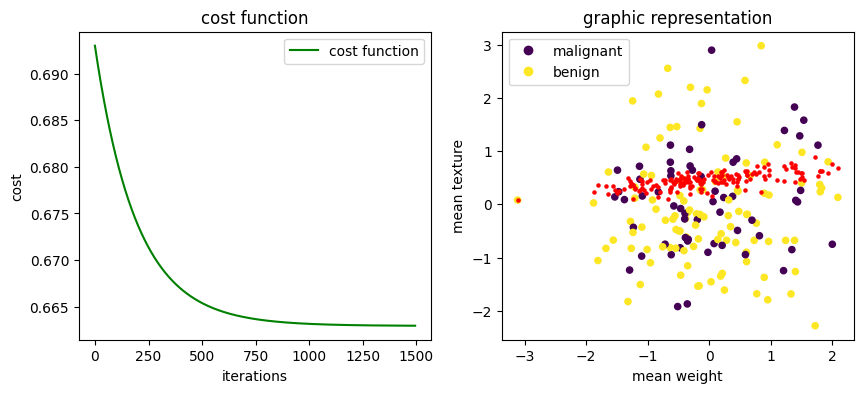

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
ax1, ax2 = axes.ravel()

ax1.plot(costs, color='g', label='cost function')
ax1.set_title('cost function')
ax1.set_ylabel("cost")
scatter = ax2.scatter(x_test[0, :], x_test[1, :], c=y_test, s=20, marker='o')
ax2.scatter(x_test_sort, y_predict, color='r', s=5, label='jj')
ax2.legend(handles = scatter.legend_elements()[0], labels = ["malignant", "benign"] )
ax2.set_ylabel("mean texture")
ax2.set_xlabel("mean weight")
ax1.set_xlabel("iterations")
ax2.set_title("graphic representation")
ax1.legend()
plt.savefig('out1.png')


In [61]:
print(f"accuracy : {score[-1]}")

accuracy : 0.6549707602339181
